In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
from sklearn.datasets import  load_diabetes, load_breast_cancer
# data_= load_diabetes(as_frame=True)
data_= load_breast_cancer(as_frame=True)

# print(data_.DESCR)


In [3]:
X = data_.data
y = data_.target
X.head() 

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
X.isna().sum() 



mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train , y_test =  train_test_split(X, y, test_size=0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((455, 30), (114, 30), (455,), (114,))

In [6]:
# y_test.head()
y_test.value_counts()

target
1    74
0    40
Name: count, dtype: int64

In [7]:
# np.random.seed(1)
from sklearn.ensemble import RandomForestClassifier 

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train);


In [8]:
y_preds = rfc.predict(X_test)
np.mean(y_preds == y_test)

# rfc.score(X_test,y_test)

0.9210526315789473

In [9]:
rfc.predict_proba(X_test)[:5,:]

array([[0.  , 1.  ],
       [1.  , 0.  ],
       [0.23, 0.77],
       [0.01, 0.99],
       [0.  , 1.  ]])

## Try with regression model, well its a classification dataset, but still just to see

In [10]:
# np.random.seed(1)
from sklearn.ensemble import RandomForestRegressor 
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)
score = rfr.score(X_test, y_test)
print("Model Score:", score)
y_preds_rg = rfr.predict(X_test)
y_preds_rg[:8]

Model Score: 0.793879527027027


array([1.  , 0.  , 0.97, 1.  , 1.  , 0.34, 0.  , 0.76])

## METRICS AND SCORING

# Classification model evaluation metrics
1. Accuracy
2. Area under ROC curve
3. Confusion matrix
4. Classification report

In [11]:
from sklearn.model_selection import cross_val_score

Model is trained on 5 different versions of training data, and
evaluated on 5 different versions of test data.

In [12]:
score_on_cv = cross_val_score(rfc, X, y, cv = 5)
print("Score on different partition(split, subsets) on data\n: ", score_on_cv)

Score on different partition(split, subsets) on data
:  [0.92982456 0.94736842 0.99122807 0.98245614 0.97345133]


In [13]:
print(f" Classifier Cross—Validated Accuracy: {np.mean(score_on_cv) *100:.2f}%\n")

 Classifier Cross—Validated Accuracy: 96.49%



**Area under the receiver operating characteristic curve (AUC/ROC)**
* Area under curve (AUC) or ROC curves

ROC curves are a comparison of a model's true postive rate (tpr) versus a models false positive rate (fpr) .

* True positive = model predicts 1 when truth is 1
* False positive = model predicts 1 when truth is 0
* True negative = model predicts 0 when truth is 0
* False negative = model predicts 0 when truth is 1
 

In [14]:
y_probs = rfc.predict_proba(X_test)
y_probs[:8]

array([[0.  , 1.  ],
       [1.  , 0.  ],
       [0.23, 0.77],
       [0.01, 0.99],
       [0.  , 1.  ],
       [0.6 , 0.4 ],
       [1.  , 0.  ],
       [0.16, 0.84]])

In [15]:
from sklearn.metrics import roc_curve
# Caculate fpr, tpr and thresholds
y_probs_positive = y_probs[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)

In [16]:
# Plotting ROC curve
import matplotlib.pyplot as plt
def plot_roc_curve(fpr, tpr, ax=None):
    """
    Plots a ROC curve given the false positive rate (fpr)
    and true positive rate (tpr) of a model.
    """
    if ax is None:
        fig, ax = plt.subplots(figsize=(7, 7))
    
    ax.plot(fpr, tpr, color="orange", label="ROC")
    ax.plot([0, 1], [0, 1], color="green", label="Guessing", linestyle="--")
    
    ax.set_xlabel("False positive rate (fpr)")
    ax.set_ylabel("True positive rate (tpr)")
    ax.set_title("Receiver Operating Characteristic (ROC) Curve")
    ax.legend()
    
    return ax
    

<Axes: title={'center': 'Receiver Operating Characteristic (ROC) Curve'}, xlabel='False positive rate (fpr)', ylabel='True positive rate (tpr)'>

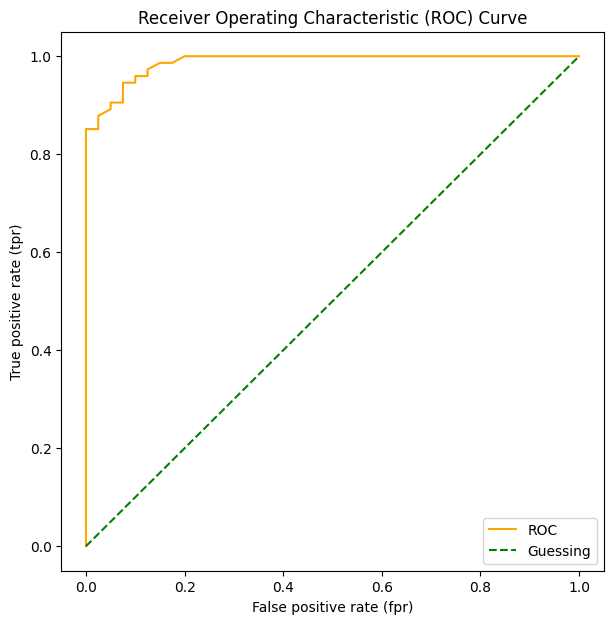

In [17]:
plot_roc_curve(fpr, tpr)

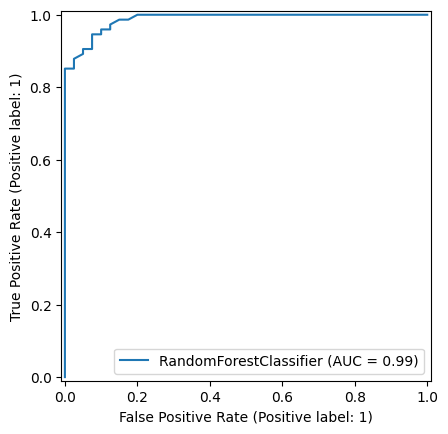

In [18]:
# Lib func
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator( rfc, X_test, y_test)
plt.show()

In [19]:
# in short
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_probs_positive)

0.987668918918919

## Confusion Matrix
A confusion matrix is a quick way to compare the labels a model predicts and the actual labels it was supposed to predict.

In essence, giving you an idea of where the model is getting confused.

In [20]:
# we need these two arrays
y_test.head() , y_preds[:6]

(101    1
 70     0
 151    1
 220    1
 137    1
 Name: target, dtype: int32,
 array([1, 0, 1, 1, 1, 0]))

In [21]:
# In short way, we can directly plot/visualize this
pd.crosstab(y_test, y_preds, rownames = [ "Actual",], colnames = ["Predicted",])

Predicted,0,1
Actual,,
0,37,3
1,6,68


In [22]:
# Another way
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_preds)
print("Conf. Matrix:",conf_mat)

Conf. Matrix: [[37  3]
 [ 6 68]]


In [23]:
# import sys
# !{sys.executable} -m pip install seaborn

In [25]:
# Make our confusion matrix more visual with Seaborn 's heatmap()

# import seaborn as sns
# # Set the font scale
# sns.set(font_scale = 1.5)
# # sns.heatmap(conf_mat);
# # y_test.value_counts()

# def plot_confusion_mat(conf_mat):
#     """Plots confusion matrix using seaborn's heatmap"""
#     fig, ax = plt.subplots(figsize=(3,3))
#     ax = sns.heatmap(conf_mat,
#                     annot=True,
#                     cbar=True)
#     ax.set(
#         xlabel="Predicted label", ylabel="True label",
#         title="Confusion Matrix"
#     )

# plot_confusion_mat(conf_mat)

ModuleNotFoundError: No module named 'seaborn'

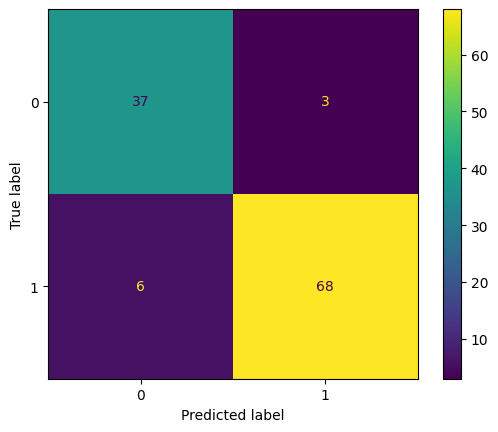

In [26]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Compute confusion matrix
# cm = confusion_matrix(y_test, y_preds, labels=rfc.classes_)
# disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rfc.classes_)
# disp.plot() 
# plt.show() 

disp1 = ConfusionMatrixDisplay.from_estimator(rfc, X_test, y_test)

In [27]:
# from sklearn.metrics import (precision_recall_curve, 
#                                 PrecisionRecallDisplay)
# precision, recall, _ = precision_recall_curve(y_test, y_preds)
# disp = PrecisionRecallDisplay(precision=precision, recall=recall)
# disp.plot()
# plt.show()

* Precision - Indicates the proportion of positive identifications (model predicted class 1)
which were actually correct. A model which produces
no false positives has a precision of 1.0.
* Recall - Indicates the proportion of actual positives which were correctly
classified. A model which produces no false negatives has a recall of 1.0.
* Fl score - A combination of precision and recall. A perfect model
achieves an Fl score of 1.0.
* Support - The number of samples each metric was calculated on.
* Accuracy The accuracy of the model in decimal form. Perfect accuracy
is equal to 1.0.
* Macro avg - Short for macro average, the average precision, recall and
Fl score between classes. Macro avg doesn't class imbalance into
effort, so if you do have class imbalances, pay attention to this metric.
* Weighted avg - Short for weighted average, the weighted average
precision, recall and Fl score between classes. Weighted means each
metric is calculated with respect to how many samples there are in each
class. This metric will favour the majority class (e.g. will give a high value
when one class out performs another due to having more samples).

In [28]:

from sklearn.metrics import classification_report
c_rep = classification_report(y_test, y_preds)
print(c_rep)

              precision    recall  f1-score   support

           0       0.86      0.93      0.89        40
           1       0.96      0.92      0.94        74

    accuracy                           0.92       114
   macro avg       0.91      0.92      0.91       114
weighted avg       0.92      0.92      0.92       114



In [29]:

# c_rep_df = pd.DataFrame( classification_report(y_test, y_preds, output_dict = True) )
# c_rep_df

In [30]:
import matplotlib.pyplot as plt

def plot_classification_report(y_test, y_preds):
    """
    Plots a bar chart for precision, recall, and f1-score for each class in the classification report.

    Parameters:
    - y_test (array-like): True labels.
    - y_preds (array-like): Predicted labels.
    """
    report_data = classification_report(y_test, y_preds, output_dict=True)
    metrics = ['precision', 'recall', 'f1-score']
    class_names = [cls for cls in report_data.keys() if cls not in ['accuracy', 'macro avg', 'weighted avg']]
    class_data = {cls: [report_data[cls][metric] for metric in metrics] for cls in class_names}

    fig, ax = plt.subplots(figsize=(5,5))

    width = 0.2

    # Class-wise metrics
    for i, cls in enumerate(class_names):
        ax.bar(np.arange(len(metrics)) + i * width, class_data[cls], width=width,  label=f'Class {cls} (support: {int(report_data[cls]["support"])})')
        # ax.bar(np.arange(len(metrics)) + i * width, class_data[cls], width=width, label='Class ' + cls)
 
    ax.set_xticks(np.arange(len(metrics)) + width)
    ax.set_xticklabels(metrics)
    ax.set_ylabel('Score')
    ax.set_title('Classification Report')
    ax.legend(loc='best', fontsize="x-small" , bbox_to_anchor=(0.5, -0.1))

    plt.show()


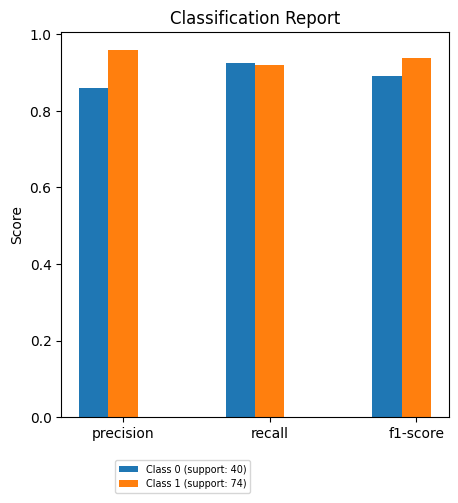

In [31]:
plot_classification_report(y_test,y_preds)


## Hyperparameter tuning with RandomizedSearchCV


In [32]:
from sklearn.model_selection import GridSearchCV
grid = {"n_estimators" : [10, 50, 100, 200 ],
        # "max_features" : ["auto", "sqrt"]
       }
gs_rfc = GridSearchCV(estimator=rfc, param_grid=grid, cv=5, return_train_score=True, verbose=4)

In [39]:
gs_rfc.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5] END n_estimators=10;, score=(train=1.000, test=0.934) total time=   0.0s
[CV 2/5] END n_estimators=10;, score=(train=0.997, test=0.967) total time=   0.0s
[CV 3/5] END n_estimators=10;, score=(train=0.997, test=0.967) total time=   0.0s
[CV 4/5] END n_estimators=10;, score=(train=1.000, test=0.956) total time=   0.0s
[CV 5/5] END n_estimators=10;, score=(train=0.997, test=0.967) total time=   0.0s
[CV 1/5] END n_estimators=50;, score=(train=1.000, test=0.956) total time=   0.1s
[CV 2/5] END n_estimators=50;, score=(train=1.000, test=0.978) total time=   0.1s
[CV 3/5] END n_estimators=50;, score=(train=1.000, test=0.978) total time=   0.2s
[CV 4/5] END n_estimators=50;, score=(train=1.000, test=0.967) total time=   0.2s
[CV 5/5] END n_estimators=50;, score=(train=1.000, test=0.967) total time=   0.1s
[CV 1/5] END n_estimators=100;, score=(train=1.000, test=0.956) total time=   0.2s
[CV 2/5] END n_estimators=100;, score

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'n_estimators': [10, 50, 100, 200]},
             return_train_score=True, verbose=4)

In [40]:
# Evaluate the best model from GridSearchCV
best_model_score = gs_rfc.score(X_test, y_test)
print(f"Best model score after tuning: {best_model_score}")
print(f"Best parameters: {gs_rfc.best_params_}")

Best model score after tuning: 0.9210526315789473
Best parameters: {'n_estimators': 100}
